#### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.Use numpy.fft.ifft()to inverse transform the frequency spectrumto time domain signal.


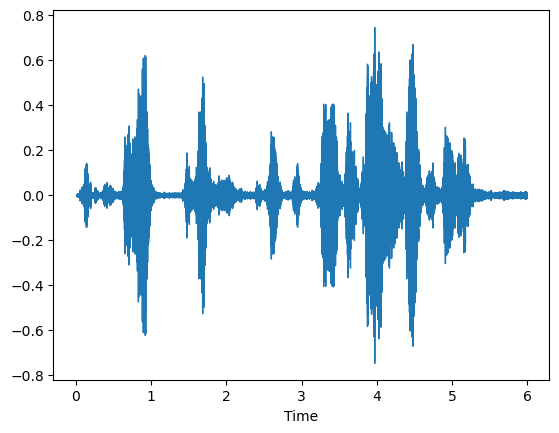

In [13]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import scipy.io.wavfile as wavfile
from glob import glob
import seaborn as sns
from scipy.signal import spectrogram
y, sr = librosa.load('Recording.wav')
librosa.display.waveshow(y)

In [20]:
a = glob('Recording.wav')
ipd.Audio(a[0])
fft_result = np.fft.fft(y)
print("after fft:")
ipd.display(ipd.Audio(fft_result, rate=sr))

after fft:


C:\Users\mithu\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [21]:
amplitude_spectrum = np.abs(fft_result)
print("amplitude spectrum")
ipd.display(ipd.Audio(amplitude_spectrum, rate=sr))

amplitude spectrum


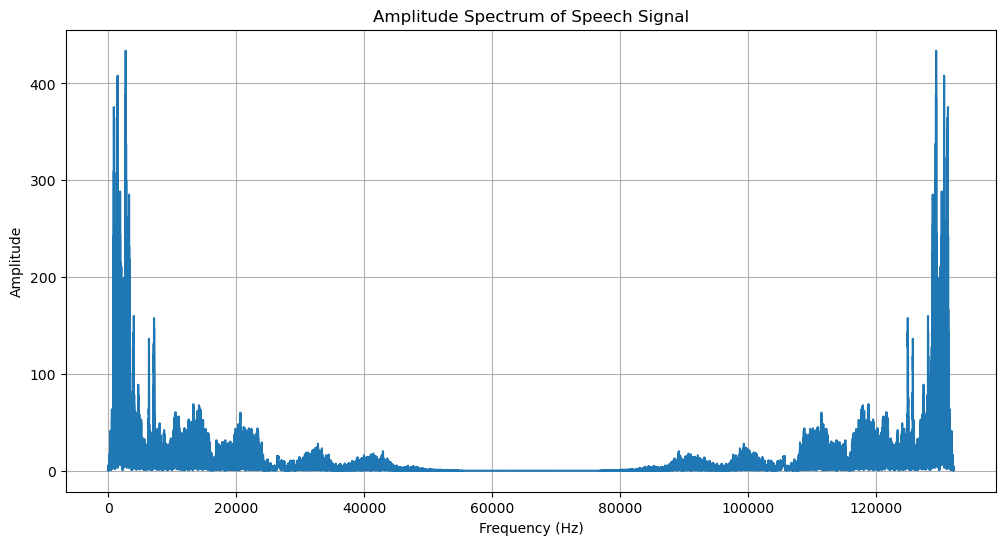

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [23]:
ifft_result = np.fft.ifft(fft_result)
print("after reconstruction")
ipd.Audio(np.real(ifft_result), rate=sr)

after reconstruction


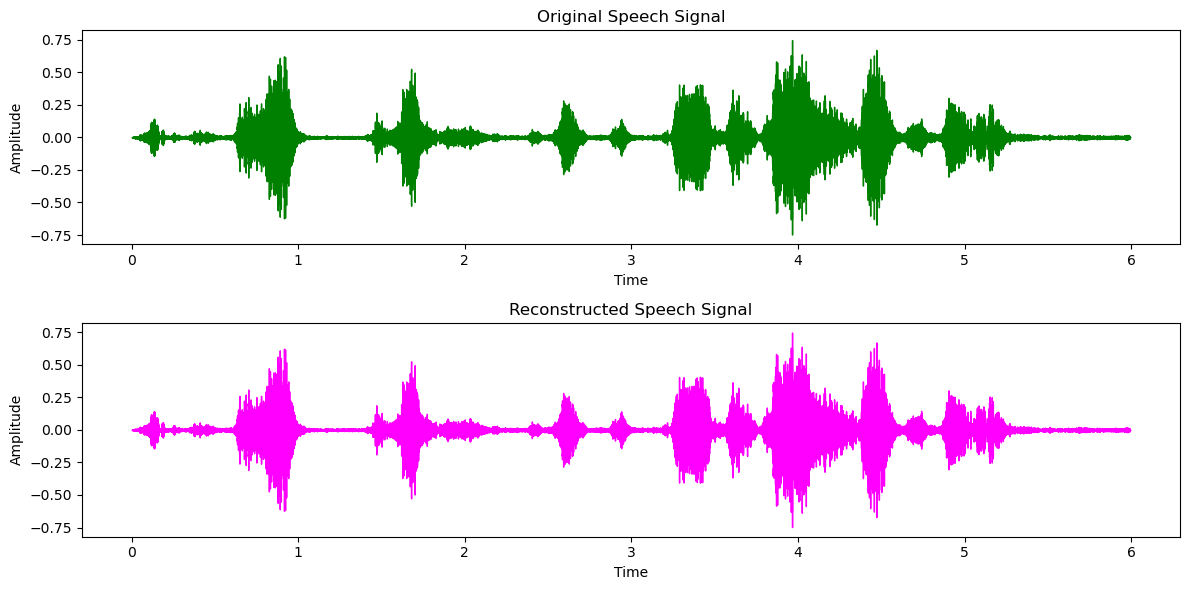

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(ifft_result), sr=sr, color='magenta')  # Use np.real() to extract the real part
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


#### A2. Use a rectangular window to select the low frequency components from your spectrum.Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.


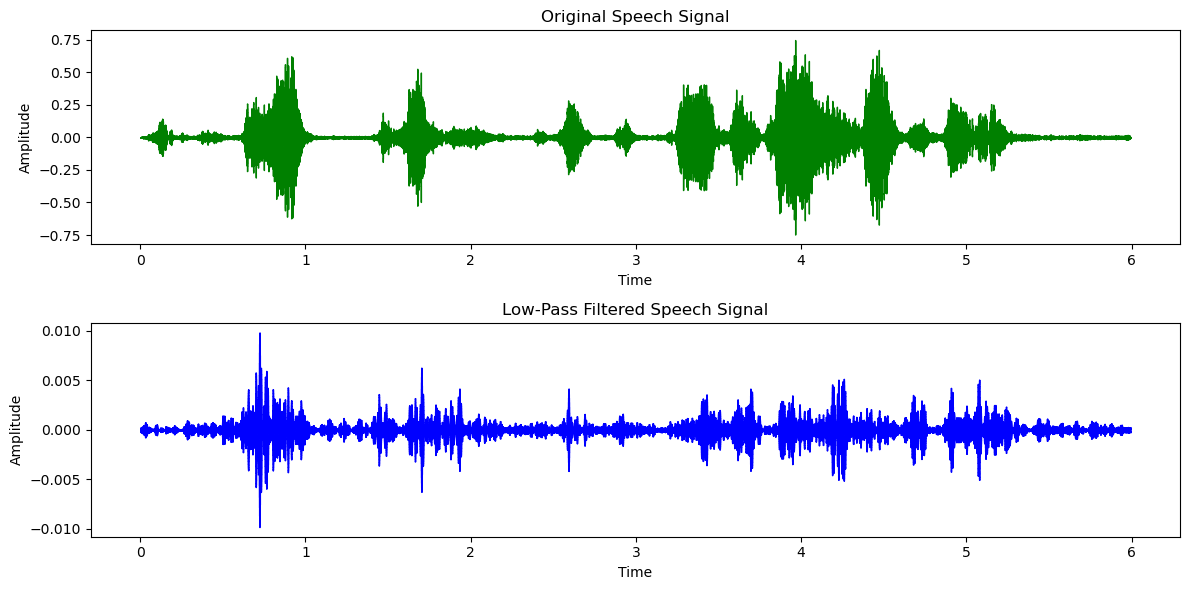

In [25]:
def apply_window_and_inverse_transform(fft_data, window):
    windowed_spectrum = fft_data * window
    filtered_signal = np.fft.ifft(windowed_spectrum)
    return filtered_signal
low_pass_window = np.ones_like(fft_result)
low_pass_cutoff = 500  
low_pass_window[low_pass_cutoff:] = 0  
filtered_low_pass = apply_window_and_inverse_transform(fft_result, low_pass_window)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Text(100.97222222222221, 0.5, 'Amplitude')

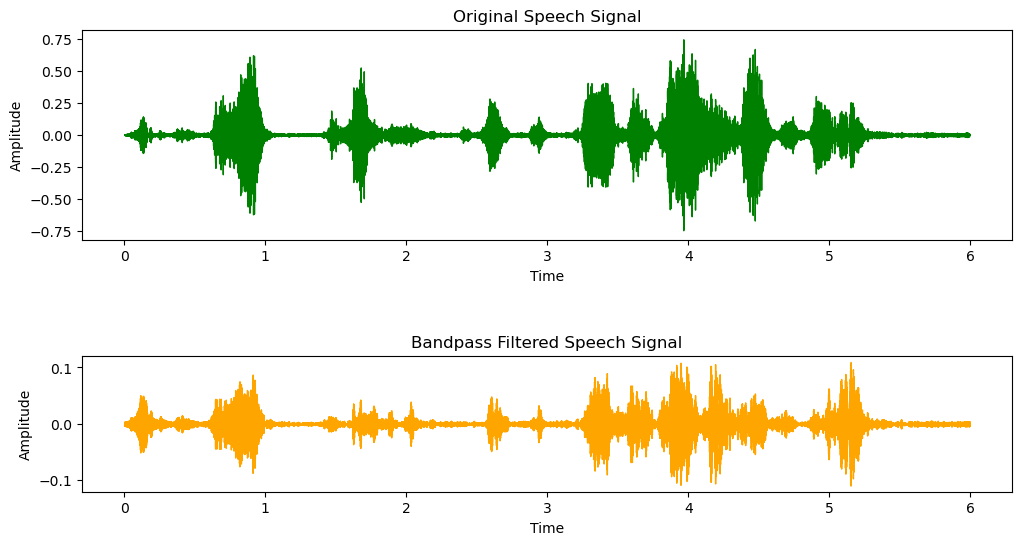

In [26]:
ipd.Audio(np.real(filtered_low_pass), rate=sr)
bandpass_window = np.zeros_like(fft_result)
bandpass_low_cutoff = 500  
bandpass_high_cutoff = 1500  
bandpass_window[bandpass_low_cutoff:bandpass_high_cutoff] = 1
filtered_bandpass = apply_window_and_inverse_transform(fft_result, bandpass_window)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='orange')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

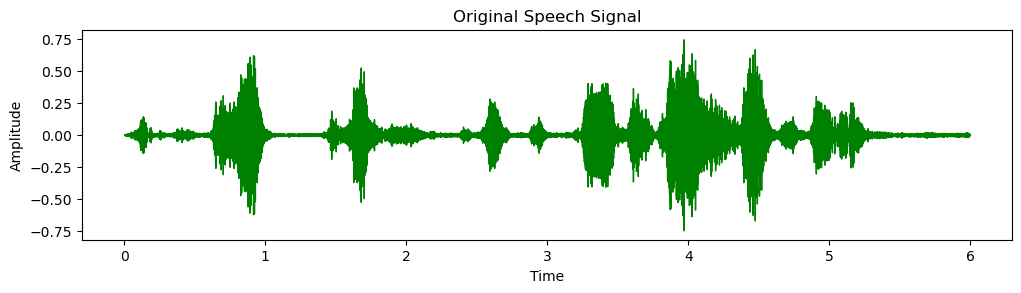

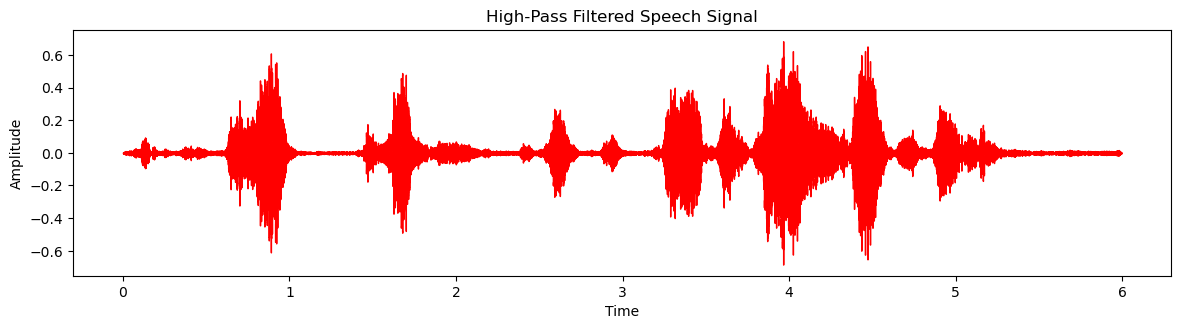

In [27]:
ipd.Audio(np.real(filtered_bandpass), rate=sr)
high_pass_window = np.ones_like(fft_result)
high_pass_cutoff = 1500  
high_pass_window[:high_pass_cutoff] = 0  
filtered_high_pass = apply_window_and_inverse_transform(fft_result, high_pass_window)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

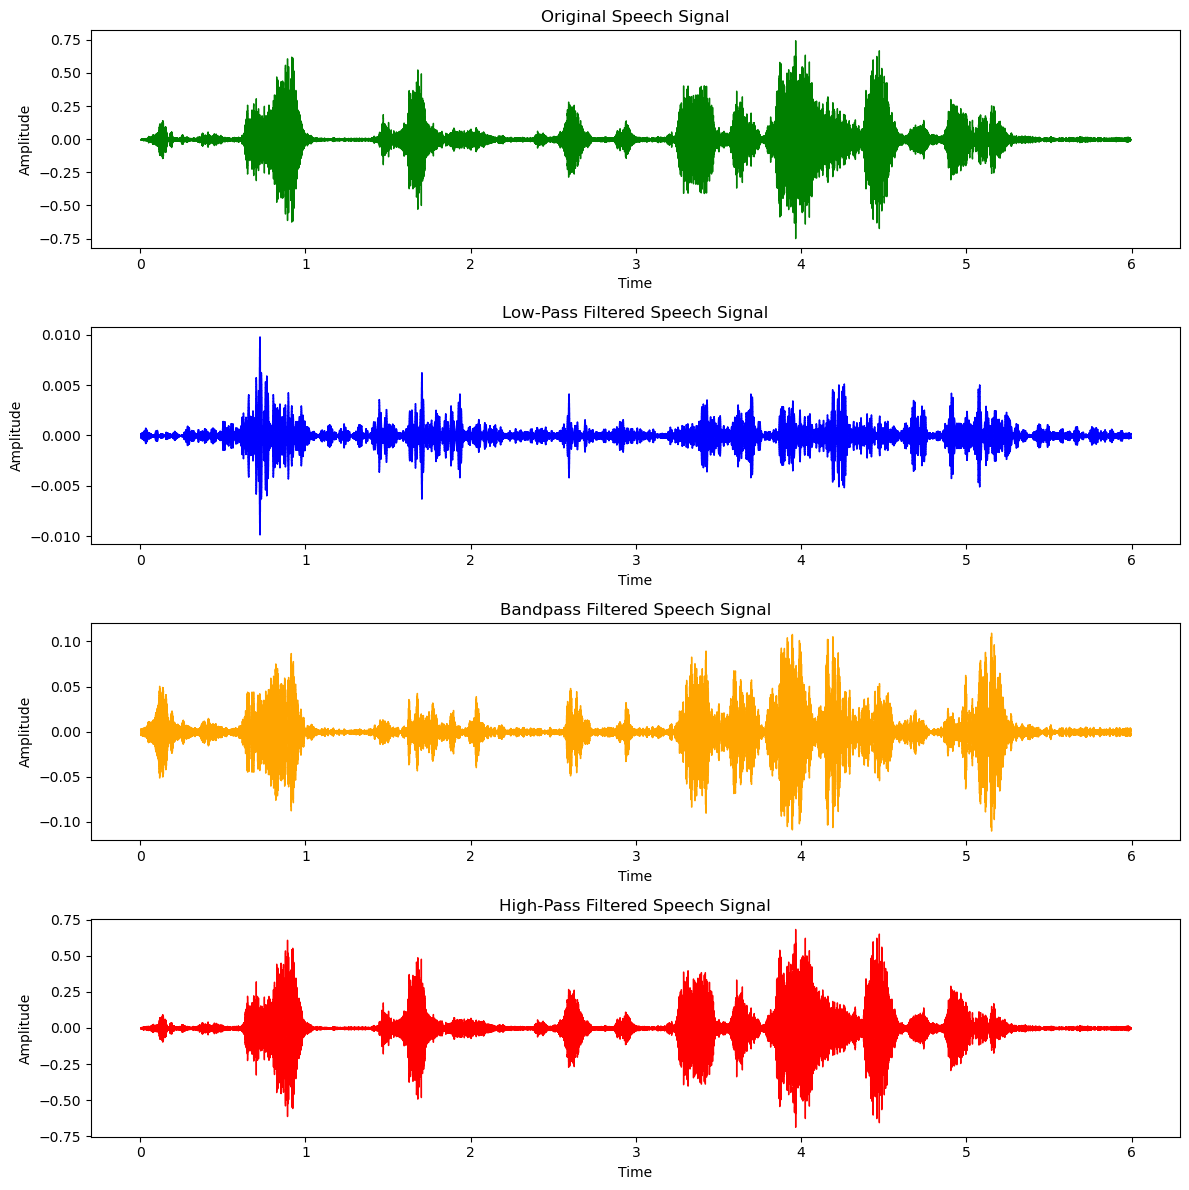

In [33]:
ipd.Audio(np.real(filtered_high_pass), rate=sr)
plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
librosa.display.waveshow(np.real(filtered_low_pass), sr=sr, color='blue')
plt.title('Low-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
librosa.display.waveshow(np.real(filtered_bandpass), sr=sr, color='orange')
plt.title('Bandpass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(4, 1, 4)
librosa.display.waveshow(np.real(filtered_high_pass), sr=sr, color='red')
plt.title('High-Pass Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Text(44.222222222222214, 0.5, 'Amplitude')

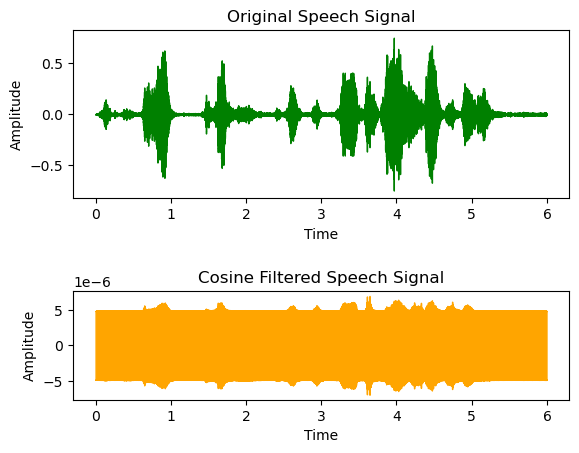

In [28]:
cosine_window = np.cos(np.linspace(0, np.pi, len(fft_result)))
cosine_window /= np.max(cosine_window)  
filtered_cosine = apply_window_and_inverse_transform(fft_result, cosine_window)

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3,1,3)
librosa.display.waveshow(np.real(filtered_cosine), sr=sr, color='orange')
plt.title('Cosine Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

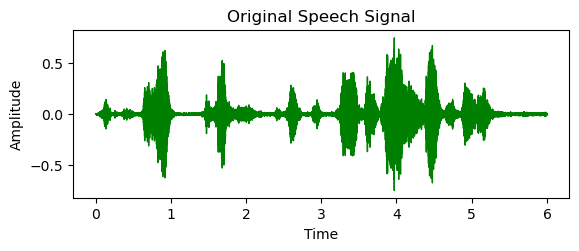

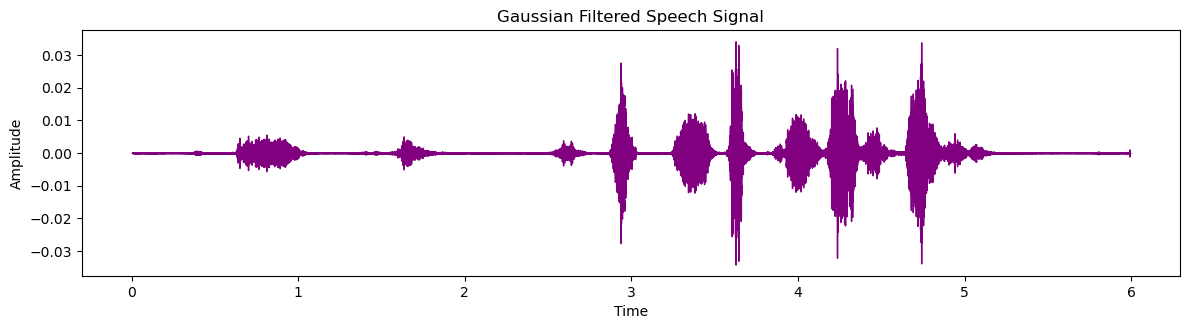

In [29]:
ipd.Audio(np.real(filtered_cosine), rate=sr)
gaussian_window = np.exp(-(np.arange(len(fft_result)) - len(fft_result) / 2)**2 / (2 * (len(fft_result) / 8)**2))
filtered_gaussian = apply_window_and_inverse_transform(fft_result, gaussian_window)
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, color='green')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
librosa.display.waveshow(np.real(filtered_gaussian), sr=sr, color='purple')
plt.title('Gaussian Filtered Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [30]:
ipd.Audio(np.real(filtered_gaussian), rate=sr)
